In [48]:
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas_explode

In [3]:
os.chdir(r"D:\Code_Heroku")
os.getcwd()

'D:\\Code_Heroku'

In [4]:
anime = pd.read_csv("anime.csv")


In [5]:
print(anime.shape)


(12294, 7)
(7813737, 3)


In [6]:
print(anime.head())


   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  
   user_id  anime_id  rating
0        1        20      -1
1        1        24      -1
2        1        79      -1
3        1       226      -1
4

## CONTENT BASED FILTERING

### Preprocessing

In [7]:
for i in anime.columns:
    print(i)

anime_id
name
genre
type
episodes
rating
members


In [8]:
#check for null values
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Thus we see that there are NULL values. I need to do something about that.

In [196]:
anime = anime.fillna(" ")

In [9]:
#checking dtypes
anime.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

### Visualization

Now, we have a problem here. We see that the genre column has multiple values within a single cell. We need to either one-hot encode (which effectively increases dimensionality) or need to go for exploding each anime into multiple rows, based on all the different genres.

NOTE: We do not need to do this for the model. This is just to get a visualization of the genres. So I will be keeping a copy of anime in anime_2 and doing all alterations and visualizations there.

In [165]:
#making copy
anime_2 = anime.copy()

In [166]:
#filling out all NULL values
anime_2 = anime_2.fillna(" ")

In [167]:
#checking if every NULL value got filled
anime_2.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [168]:
my_dic = {}
for i in range(len(anime_2)):
    temp = (anime_2["genre"].loc[i].split())
    for row in temp:
        o = row.replace(",", " ")
        o = o.replace(" ", "")
        if o in my_dic:
            my_dic[o] += 1
        else:
            my_dic[o] = 1

print(my_dic)
new_dfme = pd.DataFrame([my_dic]).transpose()
new_dfme = new_dfme.sort_values(by = [0], ascending = False)
new_dfme

{'Drama': 2016, 'Romance': 1464, 'School': 1220, 'Supernatural': 1037, 'Action': 2845, 'Adventure': 2348, 'Fantasy': 2309, 'Magic': 778, 'Military': 426, 'Shounen': 1777, 'Comedy': 4645, 'Historical': 806, 'Parody': 408, 'Samurai': 148, 'Sci-Fi': 2070, 'Thriller': 87, 'Sports': 543, 'Super': 465, 'Power': 465, 'Space': 381, 'Slice': 1220, 'of': 1220, 'Life': 1220, 'Mecha': 944, 'Music': 860, 'Mystery': 495, 'Seinen': 547, 'Martial': 265, 'Arts': 265, 'Vampire': 102, 'Shoujo': 658, 'Horror': 369, 'Police': 197, 'Psychological': 229, 'Demons': 294, 'Ecchi': 637, 'Josei': 54, 'Ai': 120, 'Game': 181, 'Dementia': 240, 'Harem': 317, 'Cars': 72, 'Kids': 1609, 'Hentai': 1141, 'Yaoi': 39, 'Yuri': 42}


,0
Comedy,4645
Action,2845
Adventure,2348
Fantasy,2309
Sci-Fi,2070
Drama,2016
Shounen,1777
Kids,1609
Romance,1464
Slice,1220


In [174]:
new_dfme.reset_index(level=0, inplace=True)
new_dfme

,index,0
0,Comedy,4645
1,Action,2845
2,Adventure,2348
3,Fantasy,2309
4,Sci-Fi,2070
5,Drama,2016
6,Shounen,1777
7,Kids,1609
8,Romance,1464
9,Slice,1220


In [190]:
#lets take only the top 15 for effective visualization
new_dfme_2 = new_dfme[0:10]
new_dfme_2

,index,0
0,Comedy,4645
1,Action,2845
2,Adventure,2348
3,Fantasy,2309
4,Sci-Fi,2070
5,Drama,2016
6,Shounen,1777
7,Kids,1609
8,Romance,1464
9,Slice,1220


#### Let's graph, babay!!!!

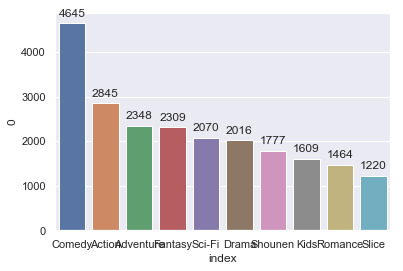

In [191]:
import seaborn as sns
sns.set()
ax = sns.barplot(x=new_dfme_2["index"], y=new_dfme_2[0], hue=None, data = new_dfme_2, estimator = sum, ci = None)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

As we can see, Comedy is way high on the totem pole.

Now continuing on with making the actual recommendor system, we will consider the anime dataset.

Let us take a look at the columns of anime.

In [189]:
anime.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

For suggesting similar animes, I reckon we only need the genre and type. So I will create a separate column which would have all these values combined.

NOTE: Why not rating? Because we are not aiming to go for similarly rated anime shows. We want a similarly themed show.

### First, selecting all relevant features.

In [210]:
features = ["genre", "type"]

### Creating the row here with a function

In [208]:
def combine_features(row):
    try:
        return row["genre"]+ " " + row["type"]
    except:
        print("Error:", row)
anime["combined_features"] = anime.apply(combine_features, axis = 1)

In [214]:
#removing all commas
anime["combined_features"] = anime["combined_features"].str.replace(",", "")
anime["combined_features"]

0                  Drama Romance School Supernatural Movie
1        Action Adventure Drama Fantasy Magic Military ...
2        Action Comedy Historical Parody Samurai Sci-Fi...
3                                       Sci-Fi Thriller TV
4        Action Comedy Historical Parody Samurai Sci-Fi...
                               ...                        
12289                                           Hentai OVA
12290                                           Hentai OVA
12291                                           Hentai OVA
12292                                           Hentai OVA
12293                                         Hentai Movie
Name: combined_features, Length: 12294, dtype: object

### Everything has been prepared now. Now all's we gotta do is the math part.

In [217]:
#creating count matrix
cv = CountVectorizer()
count_matrix = cv.fit_transform(anime["combined_features"])
print(count_matrix.toarray())

[[0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [290]:
#getting cosine similarity score
sim_scores = cosine_similarity(count_matrix)
print(sim_scores)

[[1.         0.15811388 0.         ... 0.         0.         0.31622777]
 [0.15811388 1.         0.35355339 ... 0.         0.         0.        ]
 [0.         0.35355339 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         1.         0.5       ]
 [0.         0.         0.         ... 1.         1.         0.5       ]
 [0.31622777 0.         0.         ... 0.5        0.5        1.        ]]


Next, we need to define two functions, the choice of which will be apparent.

In [221]:
def get_name_from_id(anime_id):
    return anime[anime.anime_id == anime_id]["name"].values[0]

def get_id_from_name(name):
    return anime[anime.name == name]["anime_id"].values[0]

In [223]:
get_name_from_id(32281)

'Kimi no Na wa.'

In [225]:
get_id_from_name("Kimi no Na wa.")

32281

# YES IT WORKS

Next let us choose a random anime whose similar animes need to be found.

In [327]:
anime_to_match = "Steins;Gate"

Lets get the index.

In [328]:
anime_index = get_id_from_name(anime_to_match)
print(anime_index)

9253


In [329]:
real_index = anime.loc[anime['anime_id'] == anime_index].index[0]
print(real_index)

3


In [330]:
#getting inside the sim scores matrix
similar_movies = sim_scores[real_index] #the particular row
print(similar_movies)

# now enumerate
similar_movies = list(enumerate(similar_movies))
print(similar_movies)



[0.        0.1767767 0.5       ... 0.        0.        0.       ]
[(0, 0.0), (1, 0.17677669529663687), (2, 0.5), (3, 1.0), (4, 0.5), (5, 0.20412414523193154), (6, 0.20412414523193154), (7, 0.4082482904638631), (8, 0.3333333333333333), (9, 0.5), (10, 0.17677669529663687), (11, 0.0), (12, 0.5), (13, 0.5), (14, 0.20412414523193154), (15, 0.0), (16, 0.20412414523193154), (17, 0.15811388300841897), (18, 0.0), (19, 0.5), (20, 0.22360679774997896), (21, 0.0), (22, 0.5303300858899106), (23, 0.4743416490252569), (24, 0.0), (25, 0.35355339059327373), (26, 0.20412414523193154), (27, 0.15811388300841897), (28, 0.15811388300841897), (29, 0.5669467095138407), (30, 0.17677669529663687), (31, 0.17677669529663687), (32, 0.22360679774997896), (33, 0.0), (34, 0.17677669529663687), (35, 0.0), (36, 0.4472135954999579), (37, 0.0), (38, 0.35355339059327373), (39, 0.22360679774997896), (40, 0.4082482904638631), (41, 0.0), (42, 0.22360679774997896), (43, 0.20412414523193154), (44, 0.22360679774997896), (45, 0.

Lets sort these in descending order, as we want the most similar ones.

In [331]:
#lets sort
sorted_similar_movies = sorted(similar_movies, key = lambda x:x[1], reverse = True)
print(sorted_similar_movies)

[(3, 1.0), (3581, 0.8660254037844388), (7984, 0.8660254037844388), (8910, 0.8660254037844388), (10079, 0.8660254037844388), (10858, 0.8660254037844388), (10898, 0.8660254037844388), (10975, 0.8660254037844388), (238, 0.7559289460184544), (59, 0.75), (126, 0.75), (196, 0.75), (776, 0.75), (940, 0.75), (994, 0.75), (1122, 0.75), (1322, 0.75), (1401, 0.75), (1660, 0.75), (1661, 0.75), (1786, 0.75), (2039, 0.75), (2080, 0.75), (2331, 0.75), (2490, 0.75), (2528, 0.75), (2532, 0.75), (2699, 0.75), (2779, 0.75), (2877, 0.75), (2988, 0.75), (3124, 0.75), (3311, 0.75), (3411, 0.75), (3459, 0.75), (3599, 0.75), (3675, 0.75), (3865, 0.75), (4208, 0.75), (4323, 0.75), (4395, 0.75), (4519, 0.75), (4553, 0.75), (4621, 0.75), (4721, 0.75), (4945, 0.75), (5025, 0.75), (5172, 0.75), (5749, 0.75), (5892, 0.75), (5976, 0.75), (6138, 0.75), (6171, 0.75), (6218, 0.75), (6294, 0.75), (6322, 0.75), (6429, 0.75), (6486, 0.75), (6502, 0.75), (6787, 0.75), (7361, 0.75), (8065, 0.75), (8263, 0.75), (8351, 0.75),

And finalamon, let us print the first 50 movies.

In [334]:
print("Anime to match:", anime_to_match, "\n")
print(anime.iloc[3,:], "\n")

i = 0
for movie in sorted_similar_movies:
    try:
        print(anime.iloc[movie[0], 1], "\t", anime.iloc[movie[0], 2], "\t", anime.iloc[movie[0], 3])
    except:
        print("Error:", movie)
    i += 1
    if i > 50:
        break

Anime to match: Steins;Gate 

anime_id                           9253
name                        Steins;Gate
genre                  Sci-Fi, Thriller
type                                 TV
episodes                             24
rating                             9.17
members                          673572
combined_features    Sci-Fi Thriller TV
Name: 3, dtype: object 

Steins;Gate 	 Sci-Fi, Thriller 	 TV
Fireball Charming 	 Sci-Fi 	 TV
Hanoka 	 Sci-Fi 	 TV
Hoshi no Ko Poron 	 Sci-Fi 	 TV
RoboDz 	 Sci-Fi 	 TV
Yuusei Kamen 	 Sci-Fi 	 TV
Steins;Gate 0 	 Sci-Fi, Thriller 	  
Escha Chron 	 Sci-Fi 	 TV
Gankutsuou 	 Drama, Mystery, Sci-Fi, Supernatural, Thriller 	 TV
Steins;Gate Movie: Fuka Ryouiki no Déjà vu 	 Sci-Fi, Thriller 	 Movie
Steins;Gate: Oukoubakko no Poriomania 	 Sci-Fi, Thriller 	 Special
Steins;Gate: Kyoukaimenjou no Missing Link - Divide By Zero 	 Sci-Fi, Thriller 	 Special
AKB0048: Next Stage 	 Music, Sci-Fi 	 TV
No.6 	 Action, Sci-Fi 	 TV
Flip Flappers 	 Comedy, Sci-Fi 	 T

## Done!